In [88]:
import random
import math
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [92]:
def RandomWalk2D_360(start, numSteps, stepSize):
    
    loc = start
    path = [start]*(numSteps + 1)
    
    for i in range(numSteps):
        
        rDegree = math.radians(random.uniform(0, 360))
        x0, y0 = loc
        x = x0 + stepSize*math.cos(rDegree)
        y = y0 + stepSize*math.sin(rDegree)
        
        loc = (x, y)
        path[i+1] = loc
    
    return path

def RandomWalk2D_simplified(start, numStpes, stepSize):
    
    loc = start
    path = [start]*(numSteps+1)
    
    directions = [1, 2, 3, 4]
    
    for i in range(numSteps):
        
        rDirection = random.choice(directions)
        x0, y0 = loc
        
        if rDirection == 1:
            x = x0 + stepSize
            y = y0
        elif rDirection == 2:
            x = x0
            y = y0 + stepSize
        elif rDirection == 3:
            x = x0 - stepSize
            y = y0
        elif rDirection == 4:
            x = x0
            y = y0 - stepSize
        else:
            raise ValueError("rDirection can be 1, 2, 3, or 4")
        
        loc = (x, y)
        path[i+1] = loc
    
    return path

def VizRandomWalk2D(start, numSteps, stepSize, rwfunc):
    
    path = rwfunc(start, numSteps, stepSize)
    xVals, yVals = zip(*path)
    
    plt.figure(figsize=(8, 8))
    plt.plot(xVals, yVals, marker='o', markersize=3, label="Path")
    
    plt.scatter(xVals[0], yVals[0], color='green', label="Start", zorder=5)
    plt.scatter(xVals[-1], yVals[-1], color='red', label="End", zorder=5)

    plt.title(f"2D Random Walk ({numSteps} steps, Step Size: {stepSize})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
    return None

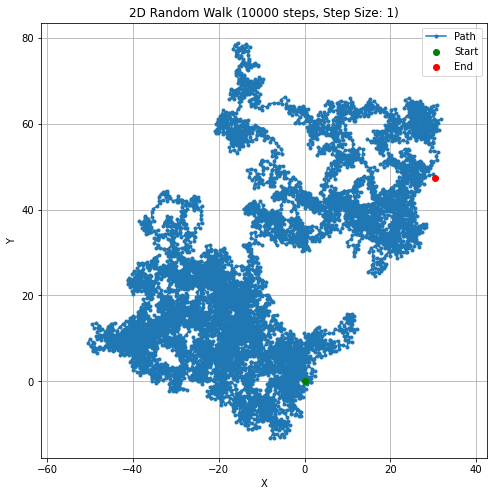

In [107]:
VizRandomWalk2D((0, 0), 10000, 1, RandomWalk2D_360)

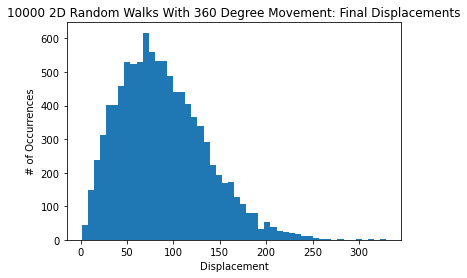

In [106]:
displacements = []
trials = 10000
for _ in range(trials):
    path = RandomWalk2D_360((0, 0), 10000, 1)
    displacements.append(math.dist((0, 0), path[-1]))

plt.title(f"{trials} 2D Random Walks With 360 Degree Movement: Final Displacements")
plt.xlabel("Displacement")
plt.ylabel("# of Occurrences")
plt.hist(displacements, bins=50)
plt.show()

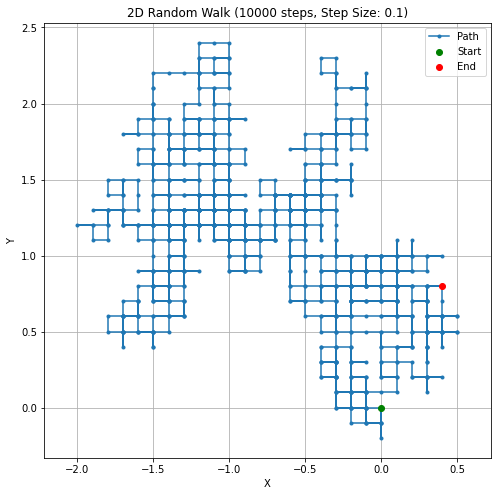

In [94]:
VizRandomWalk2D((0, 0), 10000, 0.1, RandomWalk2D_simplified)

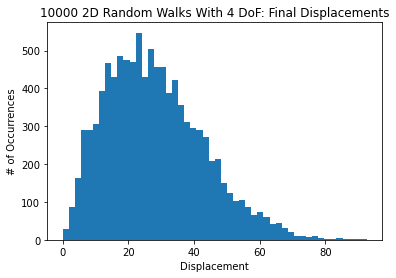

In [105]:
displacements = []
trials = 10000
for _ in range(trials):
    path = RandomWalk2D_simplified((0, 0), 10000, 1)
    displacements.append(math.dist((0, 0), path[-1]))

plt.title(f"{trials} 2D Random Walks With 4 DoF: Final Displacements")
plt.xlabel("Displacement")
plt.ylabel("# of Occurrences")
plt.hist(displacements, bins=50)
plt.show()

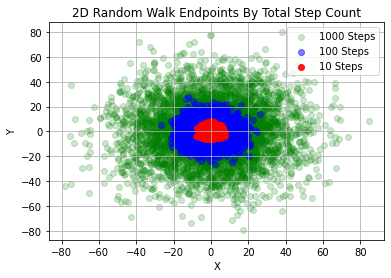

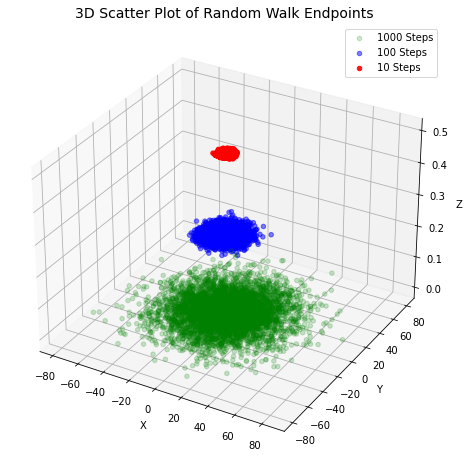

In [122]:
def finalPts(start, numSteps, trials, stepSize, rwfunc):
    res = []
    for _ in range(trials):
        res.append(rwfunc(start, numSteps, stepSize)[-1])
    return res

steps10_finals = finalPts((0, 0), 10, 5000, 1, RandomWalk2D_360)
steps100_finals = finalPts((0, 0), 100, 5000, 1, RandomWalk2D_360)
steps1000_finals = finalPts((0, 0), 1000, 5000, 1, RandomWalk2D_360)

s1000_x, s1000_y = zip(*steps1000_finals)
plt.scatter(s1000_x, s1000_y, color='green', label='1000 Steps', alpha=0.2)

s100_x, s100_y = zip(*steps100_finals)
plt.scatter(s100_x, s100_y, color='blue', label='100 Steps', alpha=0.5)

s10_x, s10_y = zip(*steps10_finals)
plt.scatter(s10_x, s10_y, color='red', label='10 Steps', alpha = 0.9)

plt.title("2D Random Walk Endpoints By Total Step Count")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

# 3D scatter version
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

s1000_z = [0] * len(s1000_x)
ax.scatter(s1000_x, s1000_y, s1000_z, color='green', label='1000 Steps', alpha=0.2)

s100_z = [0.25] * len(s100_x)
ax.scatter(s100_x, s100_y, s100_z, color='blue', label='100 Steps', alpha=0.5)

s10_z = [0.5] * len(s10_x)
ax.scatter(s10_x, s10_y, s10_z, color='red', label='10 Steps', alpha=0.9)

# Customize plot
ax.set_title("3D Scatter Plot of Random Walk Endpoints", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

plt.show()

In [118]:
def RandomWalk3D(start, numSteps, stepSize):
    
    path = [start]*(numSteps+1)
    x, y, z = start

    for i in range(numSteps):

        phi = random.uniform(0, 2 * np.pi)  # Azimuthal angle
        theta = random.uniform(0, np.pi)   # Polar angle
        
        dx = stepSize * np.sin(theta) * np.cos(phi)
        dy = stepSize * np.sin(theta) * np.sin(phi)
        dz = stepSize * np.cos(theta)
        
        x += dx
        y += dy
        z += dz
        path[i+1]=(x, y, z)
    
    return path

def VizRandomWalk3D(start, numSteps, stepSize):
    
    path = RandomWalk3D(start, numSteps, stepSize)
    xVals, yVals, zVals = zip(*path)
    
    # color gradient
    colors = plt.cm.viridis(np.linspace(0, 1, numSteps + 1))
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xVals, yVals, zVals, c=colors, s=10, label="Path", alpha=0.8)
    ax.plot(xVals, yVals, zVals, color="gray", alpha=0.5)
    
    # start and end points
    ax.scatter(*path[0], color="green", s=100, label="Start", zorder=5)
    ax.scatter(*path[-1], color="red", s=100, label="End", zorder=5)
    
    ax.set_title(f"3D Random Walk ({numSteps} Steps, Step Size: {stepSize})", fontsize=14)
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)
    ax.set_zlabel("Z", fontsize=12)
    ax.legend()

    max_range = max(
        max(xVals) - min(xVals),
        max(yVals) - min(yVals),
        max(zVals) - min(zVals)
    )
    ax.set_box_aspect([max_range] * 3)  # aspect ratio equal
    
    plt.show()
    
    return None

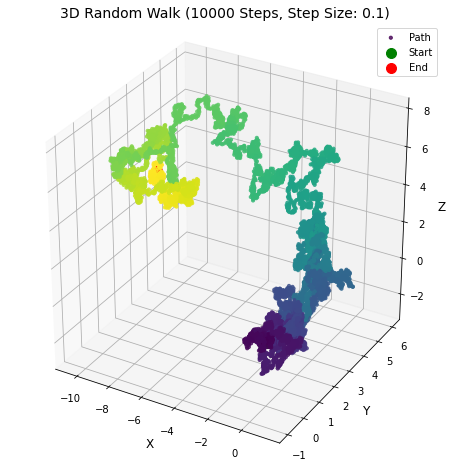

In [77]:
VizRandomWalk3D(start=(0, 0, 0), numSteps=10000, stepSize=0.1)

In [81]:
def VizRandomWalk3D_Plotly(start, numSteps, stepSize):
    
    path = RandomWalk3D(start, numSteps, stepSize)
    xVals, yVals, zVals = zip(*path)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=xVals, y=yVals, z=zVals, mode='lines+markers',
        marker=dict(size=4, color=np.linspace(0, 1, len(path)), colorscale='Viridis'),
        line=dict(color='gray', width=2)))

    # start
    fig.add_trace(go.Scatter3d(x=[xVals[0]], y=[yVals[0]], z=[zVals[0]],
        mode='markers', marker=dict(size=10, color='green'), name="Start"))
    
    # end
    fig.add_trace(go.Scatter3d(x=[xVals[-1]], y=[yVals[-1]], z=[zVals[-1]],
        mode='markers', marker=dict(size=10, color='red'), name="End"))

    # layout
    fig.update_layout(title=f"3D Random Walk ({numSteps} Steps, Step Size: {stepSize})",
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            aspectmode='cube'
        ),
        margin=dict(l=0, r=0, b=0, t=40))
    
    fig.show()


In [82]:
VizRandomWalk3D_Plotly((0, 0, 0), 10000, 0.25)